### This notebook should give you a minimal code to generate synthetic time series using the pretrained models after running stage1 and 2.

Prerequisite
- `stage1-dataset_name.ckpt` and `stage2-dataset_name.ckpt` must exist in `saved_models/`.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from evaluation.evaluation import Evaluation
from utils import load_yaml_param_settings

/media/daesoo/Data/TimeVQVAE/vector_quantization/vq.py:193: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled=False)
/home/daesoo/anaconda3/envs/timevqvae/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [2]:
# settings
dataset_name = 'Wafer'
n_samples = 100  # number of synthetic time series to sample
gpu_device_idx = 0
use_fidelity_enhancer = False

In [3]:
# fetch necessary data
config = load_yaml_param_settings(os.path.join('configs', 'config.yaml'))
df = pd.read_csv(os.path.join('datasets', 'DataSummary_UCR.csv'))
in_channels = 1  # univariate time series
input_length = int(df[df['Name'] == dataset_name]['Length'].values[0])
n_classes = int(df[df['Name'] == dataset_name]['Class'].values[0])

In [4]:
# load a model wrapper for the evaluation
evaluation = Evaluation(dataset_name, 
                        in_channels,
                        input_length, 
                        n_classes, 
                        gpu_device_idx, 
                        config, 
                        use_fidelity_enhancer=use_fidelity_enhancer,
                        ).to(gpu_device_idx)

/home/daesoo/anaconda3/envs/timevqvae/lib/python3.9/site-packages/supervised_FCN_2/example_pretrained_model_loading.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fcn.

self.X_train.shape: (5731, 1, 152)
self.X_test.shape: (1433, 1, 152)
# unique labels (train): [0 1]
# unique labels (test): [0 1]


/home/daesoo/anaconda3/envs/timevqvae/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


self.X_train.shape: (5731, 1, 152)
self.X_test.shape: (1433, 1, 152)
# unique labels (train): [0 1]
# unique labels (test): [0 1]


sampling...


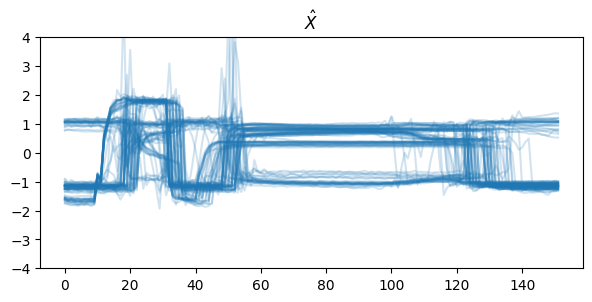

In [5]:
# unconditional sampling
# xhat_R == xhat if `use_fidelity_enhancer` is False
# xhat_R == FE(xhat) if `use_fidelity_enhancer` is True
(_, _, xhat), xhat_R = evaluation.sample(n_samples, 'unconditional', unscale=True)

ylim = (-4, 4)
plt.figure(figsize=(7,3))
plt.plot(xhat[:,0,:].T, color='C0', alpha=0.2)
plt.title(r'$\hat{X}$')
plt.ylim(*ylim)
plt.show()

if use_fidelity_enhancer:
    plt.figure(figsize=(7,3))
    plt.plot(xhat_R[:,0,:].T, color='C0', alpha=0.2)
    plt.title(r'$\hat{X}_R$')
    plt.ylim(*ylim)
    plt.show()

sampling...


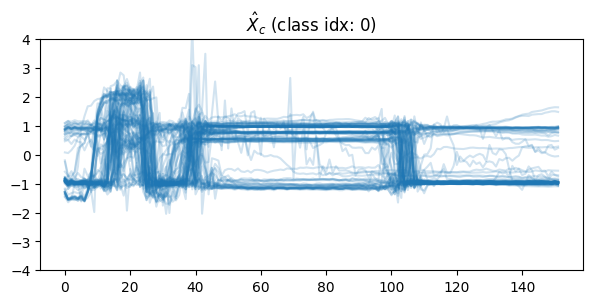

In [6]:
# class-conditional sampling
# xhat_R == xhat if `use_fidelity_enhancer` is False
# xhat_R == FE(xhat) if `use_fidelity_enhancer` is True
class_index = 0
(_, _, xhat), xhat_R = evaluation.sample(n_samples, 'conditional', class_index, unscale=True)

plt.figure(figsize=(7,3))
plt.plot(xhat[:,0,:].T, color='C0', alpha=0.2)
plt.title(r'$\hat{X}_c$' + ' ' + f'(class idx: {class_index})')
plt.ylim(*ylim)
plt.show()

if use_fidelity_enhancer:
    plt.figure(figsize=(7,3))
    plt.plot(xhat_R[:,0,:].T, color='C0', alpha=0.2)
    plt.title(r'$\hat{X}_R$' + ' ' + f'(class idx: {class_index})')
    plt.ylim(*ylim)
    plt.show()